# BL40A2030 Wireless Communication Networks

## Week 3 - Assignment

### Author: [Niki Malmsten]

**1. (M/M/1/K queue) Go to the p. 149 (sectin 7.2) of [this book](http://irh.inf.unideb.hu/user/jsztrik/publications/books/GlobeEdit_Basic_Queueing_Theory_Sztrik_2016.pdf).**

(a) Plot the block probability (probability of the queue is full when a new arrival happens) $P_K$ as a function of $K$ (size of the queue) for $\lambda = 1$ (arrival rate) and $\mu=2$ (service rate). Note that $P_K$ is the probability of having $K$ elements in the system. Use $K$ between 0 and 10.

(b) Plot the expected waiting time in the queue system $\bar{W}$ as a function of $K$ (size of the queue) for $\lambda = 1$ (arrival rate) and $\mu=2$ (service rate). Note that $P_K$ is the probability of having $K$ elements in the system. Use $K$ between 0 and 10.

(c) Discuss the trade-off involved between waiting time and block probability.

The block propability just says the chance of queue being full, which makes longest possible queue the best and in this case when the arrival rate is smaller than the service rate it is logical, but on other situations it might not be a good way to represent a queue. 
The expected waiting time only tells the average waiting time, meaning that the shortest possible queue seems to be the best, and in this situation that is completely false, so this isn't a good way to represent the propability in this case.

**2. ($x$ M/M/1 queues in tandem) Study the network of $x$ queues, a special case of the system presented in Fig. 4.16 in p. 109 from [3]. Consider that the arrival rate is $\lambda$ and the service rate is $\mu$ (the same for all servers) so that $\lambda$ smaller that $\mu$** 

- What is the probability that all $x$ queues are empty at the same time as a function of $\lambda$, $\mu$ and $\rho = \lambda/\mu$? 
- Plot this probability as a function of $\lambda$ for $\mu = 3$. Plot in the same figure using the values of $x=1,2,3,4,5$.

**3. (Optimize Slotted Aloha) In the tutorial, an optimization related to the pure Aloha was presented. Follow the same approach and optimize the Slotted Aloha. Plot the results together with the one presented in the tutorial.** 


**4. (Theory) Explain with your own words the basics of the following protocols. Whenever it is possible, compare their differences in terms of throughput, delay and implementation complexity. Use [this slides](http://www.cs.jhu.edu/~cs647/mac_lecture_2.pdf) to help.** 

- Pure Aloha
Simply just sends data and the receiver has to find out if the transmission was succesful. If a collision happens, retransmission is made after random time.
- Slotted Aloha
Works same as pure aloha, except every transmission has a time slot, so there isn't multiple simultanious transmissions, so collisions wont last that long.
- CSMA non-persistant
non-persistant CSMA sends only if there isn't any ongoing transmission.
- CSMA 1-persistant
1-persistent CSMA notices if a collision happens and stops the transmission.
- CSMA p-persistant
p-persistent CSMA tries again if a collision happens and can wait for a random time until transmits again.


In [1]:
import sympy as sp
import numpy as np 
import scipy.stats as ss
import matplotlib.pyplot as plt
import queue
import copy
from matplotlib import style
style.use('bmh')
#Not to show warning messages (to keep the notebook clean)
import warnings
warnings.filterwarnings('ignore')

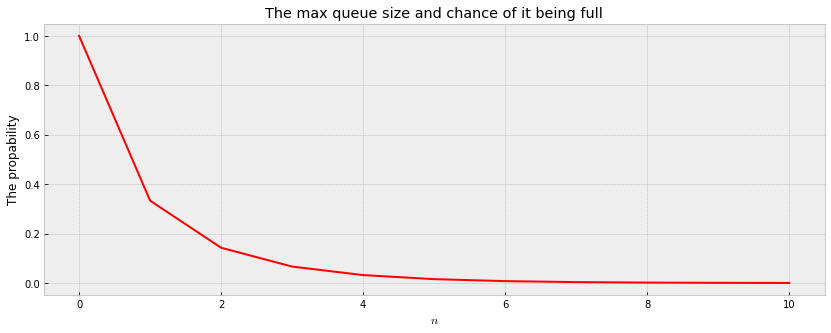

In [2]:
# 1. a.)
IAT = 1
ST = 2
rho = IAT/ST
K = [x for x in range(11)]
y = [x for x in range(11)]
Block = []
for  i in K:
    Block.append((1 -  rho)* (rho**K[i])/(1-rho**(K[i]+1)))


plt.figure(figsize=(14,5))
plt.plot(y, Block, 'r') # Plotting the propability of queue being full
plt.xlabel('$n$')
plt.ylabel('The propability')
plt.title('The max queue size and chance of it being full')
plt.show()


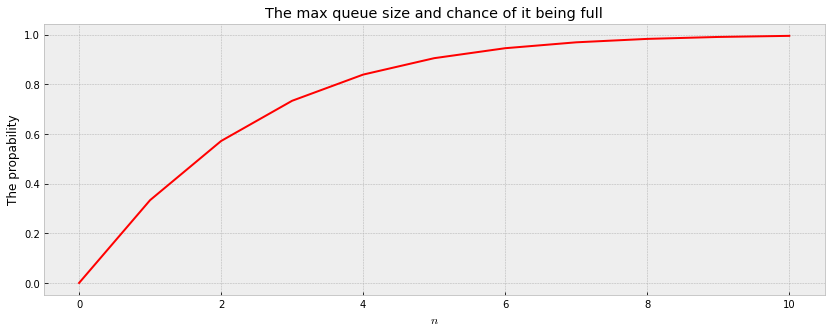

In [3]:
# 1. b.)

IAT = 1
ST = 2
rho = IAT/ST
K = [x for x in range(11)]
y = [x for x in range(11)]
N = []
Q = []
W = []
Block = []
for  i in K:
    Block.append((1 -  rho)* (rho**K[i])/(1-rho**(K[i]+1))) #The propability of queue being full
    N.append(rho*(1-(K[i]+1)*rho**K[i]+K[i]*rho**(K[i]+1))/((1-rho)*(1-rho**(K[i]+1))))
    Q.append(N[i]-(1-Block[0]))
    W.append(Q[i]/IAT) #The final wait time

plt.figure(figsize=(14,5))
plt.plot(y, N, 'r') # The wait time based on queue size
plt.xlabel('$n$')
plt.ylabel('The propability')
plt.title('The max queue size and chance of it being full')
plt.show()


In [4]:
# 2. a.)

#I didn't really understands what I was supposed to do in this question

for i in range (10):
     ar = i+1
     sr = i+2
     rho = ar/sr 
     qwt = 1/((1-rho)*sr) - 1/sr
     print("The chance of all queues being empty", round(qwt,3))


The chance of all queues being empty 0.5
The chance of all queues being empty 0.667
The chance of all queues being empty 0.75
The chance of all queues being empty 0.8
The chance of all queues being empty 0.833
The chance of all queues being empty 0.857
The chance of all queues being empty 0.875
The chance of all queues being empty 0.889
The chance of all queues being empty 0.9
The chance of all queues being empty 0.909


Hello [3.0]
Hello [3.0, 1.5]
Hello [3.0, 1.5, 0.75]
Hello [3.0, 1.5, 0.75, 0.6]
[-0.5, -1.0, 1.0, 0.49999999999999994]


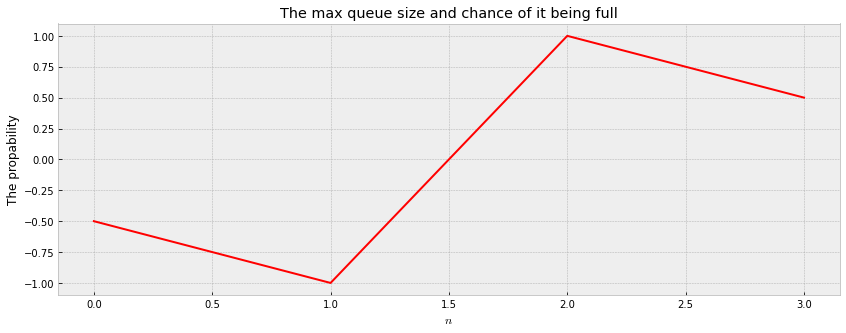

In [5]:
# 2. b.)
#I didn't really understands what I was supposed to do in this question

AR = [1, 2, 4, 5]
SR = 3
y = [x for x in range (4)]
rho = []
QWT = []
for i in range (len(AR)):
     rho.append(SR/AR[i])
     #print("Hello", rho)
     QWT.append(1/((1-rho[i])*SR) - 1/SR)
     

print(QWT)
plt.figure(figsize=(14,5))
plt.plot(y, QWT, 'r') 
plt.xlabel('$n$')
plt.ylabel('The propability')
plt.title('The max queue size and chance of it being full')
plt.show()

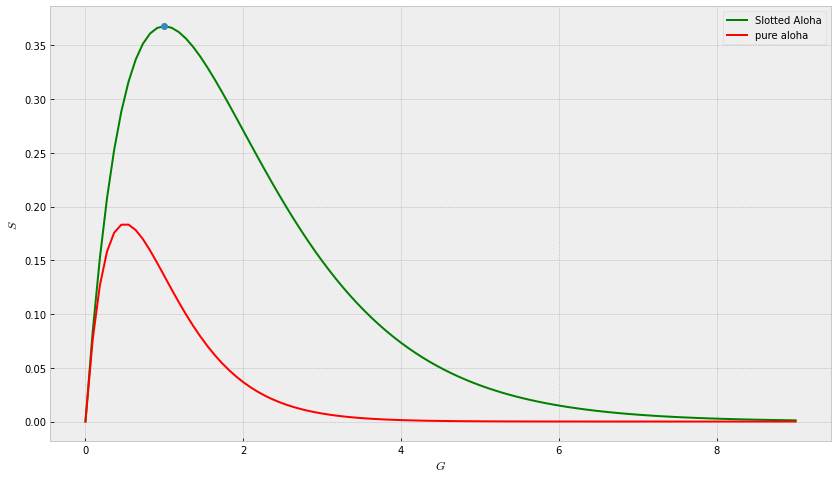

In [19]:
sp.init_printing() 
G = sp.symbols('G')
S = G * sp.exp(-G)
diff_S = sp.diff(S, G)
opt_G = sp.solve(diff_S, G)
opt_S = S.subs(G, opt_G[0])


num_G = np.linspace(0, 9 , 100) 
num_S = num_G * np.exp(-num_G)

plt.figure(figsize=(14,8))
plt.plot(num_G, num_S,'g',label='Slotted Aloha')
plt.plot(opt_G, opt_S, 'o')

num_S = num_G * np.exp(-2*num_G)
plt.plot(num_G, num_S, 'r', label = 'pure aloha')

plt.xlabel("$G$")
plt.ylabel("$S$")
plt.legend()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cc035cc0-996d-4fa3-af0c-6c39ba437636' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>